## Práctica 1: simulador para generacion de palabras
*Objetivo:*

* Continuar el análisis estadístico sobre la estructura de un idioma (español, inglés, francés, alemán, sueco, italiano, portugués).

* Obtener el cálculo de entropías del idioma con base en cadenas de Markov de mayor orden.

* Obtener el cálculo de entropías del idioma con base en cadenas de Markov de mayor orden.

*Información sobre el texto analizado:*

* Titulo: Ensayo sobre la Cegura.

* Autor: Jose Saramago.

* Idioma: Portugues.


## Desarrollo

__Probabilidad de cada uno de los símbolos en forma individual__

In [1]:
# Abrimos el archivo de texto depurado
ruta = "C:\\Users\\carlo\\OneDrive\\Documentos\\Teoria de la info\\practica0\\texto_depurado.txt"
with open(ruta, 'r',encoding="utf-8") as archivo:
    cadena = archivo.read() # guardar archivo en una cadena

In [2]:
# vector con el abecedario del portugues incluyendo el espacio '&'
ABC = ['a', 'b', 'c', 'ç', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
    'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '&']

In [3]:
import numpy as np

# conteo de repeticiones por cada caracter
ABC0 = np.zeros(len(ABC)) # vector para conteo de repeticiones de c/letra
cont = 0
for x in range(len(ABC)):
    rep = 0 # variable donde se guarda el # de repeticiones de 'x' caracter
    for y in range(len(cadena)):
        if cadena[y] == ABC[x]:
            rep += 1
    ABC0[cont] = rep # guardo el # de repeticiones en el vector de conteo
    cont += 1
    print('\n{} repeticiones: {}'.format(ABC[x], ABC0[x]))


a repeticiones: 11815.0

b repeticiones: 656.0

c repeticiones: 2999.0

ç repeticiones: 329.0

d repeticiones: 4022.0

e repeticiones: 10915.0

f repeticiones: 786.0

g repeticiones: 1053.0

h repeticiones: 1089.0

i repeticiones: 4951.0

j repeticiones: 223.0

k repeticiones: 0.0

l repeticiones: 2176.0

m repeticiones: 4152.0

n repeticiones: 4060.0

o repeticiones: 9582.0

p repeticiones: 2230.0

q repeticiones: 1163.0

r repeticiones: 5762.0

s repeticiones: 6675.0

t repeticiones: 3727.0

u repeticiones: 4178.0

v repeticiones: 1374.0

w repeticiones: 0.0

x repeticiones: 195.0

y repeticiones: 0.0

z repeticiones: 368.0

& repeticiones: 16860.0


In [4]:
p1 = np.zeros(len(ABC0))
I1 = np.zeros(len(ABC0))
for x in range(len(ABC0)):
    p = ABC0[x]/sum(ABC0) # cal de probabilidad
    p1[x] = p
    I = np.log2(1/p) # cantidad de informacion por caracter
    if np.isinf(I):
        I = 0
    I1[x] = I
    print('\n{}:\trepeticiones {}\t\tP= {}\t\tI= {} bits'.format(ABC[x], ABC0[x], p, I))


a:	repeticiones 11815.0		P= 0.11658772449180975		I= 3.100512199548695 bits

b:	repeticiones 656.0		P= 0.006473258338267219		I= 7.271292203791821 bits

c:	repeticiones 2999.0		P= 0.029593447799486874		I= 5.078578401541164 bits

ç:	repeticiones 329.0		P= 0.0032464969409907243		I= 8.266900434674662 bits

d:	repeticiones 4022.0		P= 0.03968817840931518		I= 4.6551468421045525 bits

e:	repeticiones 10915.0		P= 0.10770672982040655		I= 3.214819698531751 bits

f:	repeticiones 786.0		P= 0.007756068679692125		I= 7.010458706151298 bits

g:	repeticiones 1053.0		P= 0.01039076376554174		I= 6.5885544873841875 bits

h:	repeticiones 1089.0		P= 0.01074600355239787		I= 6.540055969692998 bits

i:	repeticiones 4951.0		P= 0.048855338464574696		I= 4.355339974447744 bits

j:	repeticiones 223.0		P= 0.00220051312413657		I= 8.8279443084896 bits

k:	repeticiones 0.0		P= 0.0		I= 0 bits

l:	repeticiones 2176.0		P= 0.02147227156108151		I= 5.541381367159564 bits

m:	repeticiones 4152.0		P= 0.04097098875074008		I= 4.60

C:\Users\carlo\AppData\Local\Temp\ipykernel_15064\2412987783.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  I = np.log2(1/p) # cantidad de informacion por caracter


__Cálculo de la entropía como fuente sin memoria.__

In [5]:
h = np.zeros(len(p1))
for x in range(len(p1)):
    h[x] = p1[x]*I1[x]
H = sum(h)
print('\nENTROPIA COMO FUENTE SIN MEMORIA= {} bits/simbolo'.format(H))


ENTROPIA COMO FUENTE SIN MEMORIA= 3.9726520396071363 bits/simbolo


__Estadística de aparición de los símbolos por parejas (dos caracteres seguidos).__

In [6]:
i = 0
j = 0
ABC = np.array( ['a', 'b', 'c', 'ç', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
    'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '&'])

cont2 = np.zeros((len(ABC), len(ABC)))

for x in range(len(ABC)):
    for y in range(len(ABC)):
        cont = 0
        for z in range(len(cadena) - 1):
            if cadena[z] == ABC[x] and cadena[z+1] == ABC[y]:
                cont += 1
        cont2[i, j] = cont
        j += 1
    j = 0
    i += 1

pares = np.zeros(len(ABC)**2)

i = 0
txt2 = ""
for x in range(len(ABC)):
    for y in range(len(ABC)):
        if cont2[x, y] != 0:
            # txt2 += ABC[x] + ABC[y] + ' repeticiones: ' + str(int(cont2[x, y])) + '\n'
            pares[i] = cont2[x, y]
        i += 1
p2 = np.zeros(len(pares))
I2 = np.zeros(len(pares))

for x in range(len(pares)):
    p = pares[x] / sum(pares)
    p2[x] = p
    I = np.log2(1/p)
    if np.isinf(I):
        I = 0
    I2[x] = I
    print('\n{}{}:\trepeticiones {}\t\tP= {}\tI= {} bits'.format(ABC[x//len(ABC)], ABC[x%len(ABC)], int(pares[x]), p, I))
    txt2 += '\n{}{}:\trepeticiones {}\t\tP= {}\tI= {} bits'.format(ABC[x//len(ABC)], ABC[x%len(ABC)], int(pares[x]), p, I)

# Guardamos las estadisticas en un archivo de texto
ruta = "C:\\Users\\carlo\\OneDrive\\Documentos\\Teoria de la info\\practica0\\estadisticas_parejas.txt"
f = open(ruta, "w", encoding="utf-8")
f.write(txt2)
f.close()



aa:	repeticiones 43		P= 0.0004243183769328689	I= 11.202565217452044 bits

ab:	repeticiones 205		P= 0.002022913192354375	I= 8.949349872648694 bits

ac:	repeticiones 233		P= 0.0022992135308222894	I= 8.76464382749986 bits

aç:	repeticiones 117		P= 0.0011545407000266433	I= 9.758465252570737 bits

ad:	repeticiones 674		P= 0.006650943861691945	I= 7.232225190972283 bits

ae:	repeticiones 37		P= 0.0003651111615468872	I= 11.41937660652519 bits

af:	repeticiones 53		P= 0.0005229970692428384	I= 10.900909517590941 bits

ag:	repeticiones 173		P= 0.0017071413769624724	I= 9.194201744517416 bits

ah:	repeticiones 6		P= 5.9207215385981705e-05	I= 14.043867471432986 bits

ai:	repeticiones 306		P= 0.003019567984685067	I= 8.371442129461489 bits

aj:	repeticiones 36		P= 0.00035524329231589023	I= 11.45890497071183 bits

ak:	repeticiones 0		P= 0.0	I= 0 bits

al:	repeticiones 571		P= 0.005634553330899259	I= 7.471483036791298 bits

am:	repeticiones 640		P= 0.006315436307838048	I= 7.306901877266779 bits

an:	re

C:\Users\carlo\AppData\Local\Temp\ipykernel_15064\2760008693.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  I = np.log2(1/p)


Las 10 parejas mas frecuentes
o& repeticiones: 4037 P: 0.03983658808553469 I: 4.649762100673631 bits
a& repeticiones: 3661 P: 0.036126269254679835 I: 4.790807913849596 bits
e& repeticiones: 3383 P: 0.033383001608462685 I: 4.904742510360153 bits
s& repeticiones: 2243 P: 0.022133630685126162 I: 5.497616067067868 bits
&a repeticiones: 2027 P: 0.020002170931230818 I: 5.643699598687243 bits
&d repeticiones: 1812 P: 0.017880579046566474 I: 5.805462732107906 bits
&e repeticiones: 1645 P: 0.016232644884989985 I: 5.944958103531538 bits
ra repeticiones: 1465 P: 0.014456428423410533 I: 6.112145022844531 bits
de repeticiones: 1392 P: 0.013736073969547756 I: 6.185886476305413 bits
es repeticiones: 1372 P: 0.013538716584927817 I: 6.206765205981329 bits


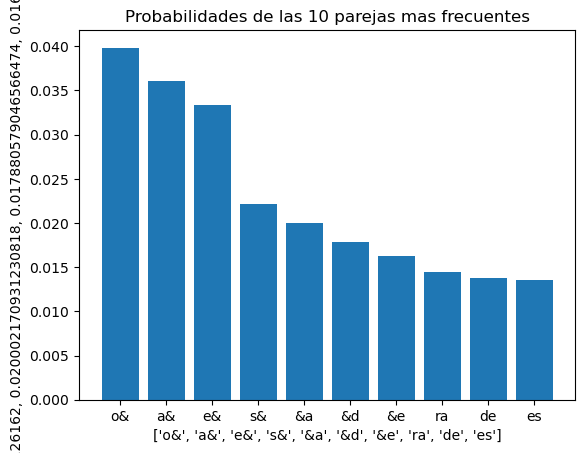

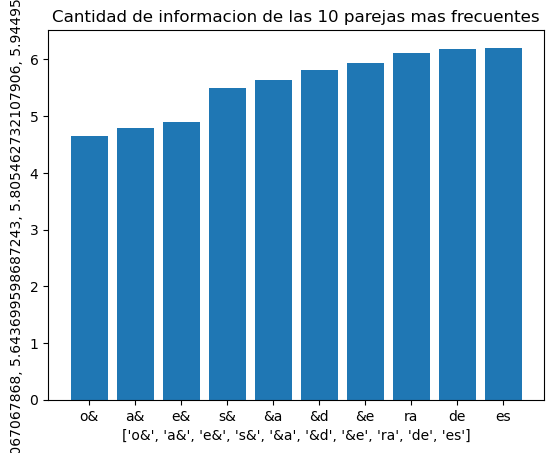

In [7]:

import re
from operator import itemgetter
import matplotlib.pyplot as plt

pattern = r"\n([\w&]{2}):\s*repeticiones\s*(\d+)\s*P=\s*(\d*\.\d+|\d+\.\d*|\d+)\s*I=\s*(\d*\.\d+|\d+\.\d*)\s*bits"


matches = re.findall(pattern, txt2)

results = []
for match in matches:
    pair = match[0]
    repetitions = int(match[1])
    probability = float(match[2])
    information = float(match[3])
    results.append((pair, repetitions, probability, information))

sorted_results = sorted(results, key=itemgetter(1), reverse=True)
top10 = sorted_results[:10]

parejas = []
probabilidades = []
informacion = []
print("Las 10 parejas mas frecuentes")
for i, (pair, repetitions, probability, information) in enumerate(top10):
    parejas.append(pair)
    probabilidades.append(probability)
    informacion.append(information)
    print(f'{pair} repeticiones: {repetitions} P: {probability} I: {information} bits')

plt.bar(parejas, probabilidades)
plt.xlabel(parejas)
plt.ylabel(probabilidades)
plt.title("Probabilidades de las 10 parejas mas frecuentes")
plt.show()

plt.bar(parejas, informacion)
plt.xlabel(parejas)
plt.ylabel(informacion)
plt.title("Cantidad de informacion de las 10 parejas mas frecuentes")
plt.show()

__Estadística de aparición de los símbolos por tercias (tres caracteres seguidos)__

In [8]:

cont3 = np.zeros((len(ABC), len(ABC), len(ABC)), dtype=int)


for a in range(len(cadena) - 2):
    x, = np.where(ABC == cadena[a])
    y, = np.where(ABC == cadena[a+1])
    z, = np.where(ABC == cadena[a+2])
    cont3[x, y, z] += 1

tercias = cont3.ravel()

# txt3 = '\n'.join([f"{ABC[x]}{ABC[y]}{ABC[z]}  repeticiones: {int(cont3[x, y, z])}" for x, y, z in zip(*cont3.nonzero())])

p3 = tercias / tercias.sum()
I3 = np.where(p3 != 0, np.log2(1/p3), 0)
txt3 = ""
for x in range(len(tercias)):
    p = tercias[x] / sum(tercias)
    p3[x] = p
    I = np.log2(1/p)
    if np.isinf(I):
        I = 0
    I3[x] = I

    print('\n{}{}{}:\trepeticiones {}\t\tP= {}\tI= {} bits'.format(ABC[x//len(ABC)**2], 
                                                                    ABC[(x//len(ABC))%len(ABC)], 
                                                                    ABC[x%len(ABC)], 
                                                                    int(tercias[x]), p, I))
    txt3 += '\n{}{}{}:\trepeticiones {}\t\tP= {}\tI= {} bits'.format(ABC[x//len(ABC)**2], 
                                                                    ABC[(x//len(ABC))%len(ABC)], 
                                                                    ABC[x%len(ABC)], 
                                                                    int(tercias[x]), p, I)

# Guardamos las estadísticas en un archivo de texto
ruta = "C:\\Users\\carlo\\OneDrive\\Documentos\\Teoria de la info\\practica0\\estadisticas_por_tercias.txt"
with open(ruta, "w", encoding="utf-8") as f:
    f.write(txt3)

C:\Users\carlo\AppData\Local\Temp\ipykernel_15064\2412117625.py:15: RuntimeWarning: divide by zero encountered in divide
  I3 = np.where(p3 != 0, np.log2(1/p3), 0)
C:\Users\carlo\AppData\Local\Temp\ipykernel_15064\2412117625.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  I = np.log2(1/p)



aaa:	repeticiones 0		P= 0.0	I= 0 bits

aab:	repeticiones 0		P= 0.0	I= 0 bits

aac:	repeticiones 1		P= 9.867966606801003e-06	I= 16.628815735757897 bits

aaç:	repeticiones 0		P= 0.0	I= 0 bits

aad:	repeticiones 0		P= 0.0	I= 0 bits

aae:	repeticiones 0		P= 0.0	I= 0 bits

aaf:	repeticiones 3		P= 2.9603899820403007e-05	I= 15.04385323503674 bits

aag:	repeticiones 3		P= 2.9603899820403007e-05	I= 15.04385323503674 bits

aah:	repeticiones 1		P= 9.867966606801003e-06	I= 16.628815735757897 bits

aai:	repeticiones 0		P= 0.0	I= 0 bits

aaj:	repeticiones 1		P= 9.867966606801003e-06	I= 16.628815735757897 bits

aak:	repeticiones 0		P= 0.0	I= 0 bits

aal:	repeticiones 2		P= 1.9735933213602006e-05	I= 15.628815735757897 bits

aam:	repeticiones 5		P= 4.9339833034005014e-05	I= 14.306887640870533 bits

aan:	repeticiones 5		P= 4.9339833034005014e-05	I= 14.306887640870533 bits

aao:	repeticiones 3		P= 2.9603899820403007e-05	I= 15.04385323503674 bits

aap:	repeticiones 3		P= 2.9603899820403007e-05	I= 15.0438

Las 10 tercias mas frecuentes
os& repeticiones: 978 P= 0.009650871341451381 I= 6.695125080805662 bits
que repeticiones: 906 P= 0.008940377745761709 I= 6.805448495711661 bits
&de repeticiones: 894 P= 0.008821962146480096 I= 6.824684714574579 bits
&qu repeticiones: 884 P= 0.008723282480412086 I= 6.840913176366464 bits
ao& repeticiones: 807 P= 0.00796344905168841 I= 6.972390872480116 bits
do& repeticiones: 791 P= 0.007805561585979593 I= 7.001281851285104 bits
&a& repeticiones: 748 P= 0.00738123902188715 I= 7.081921275870259 bits
ue& repeticiones: 700 P= 0.006907576624760702 I= 7.177604623925567 bits
as& repeticiones: 672 P= 0.0066312735597702736 I= 7.236498312979136 bits
de& repeticiones: 657 P= 0.0064832540606682585 I= 7.269066175435566 bits


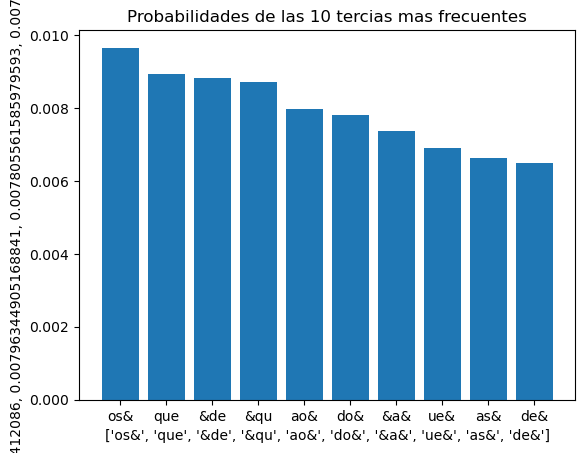

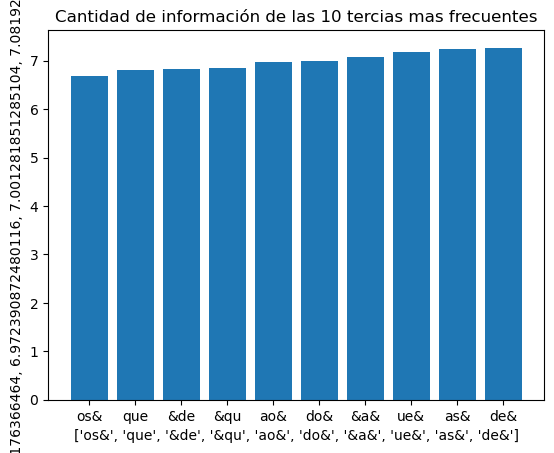

In [9]:
pattern = r"\n([\w&]{3}):\s*repeticiones\s*(\d+)\s*P=\s*(\d*\.\d+|\d+\.\d*|\d+)\s*I=\s*(\d*\.\d+|\d+\.\d*)\s*bits"


matches = re.findall(pattern, txt3)

results = []
for match in matches:
    tercia = match[0]
    repetitions = int(match[1])
    probability = float(match[2])
    information = float(match[3])
    results.append((tercia, repetitions, probability, information))

sorted_results = sorted(results, key=itemgetter(1), reverse=True)
top10 = sorted_results[:10]

tercias = []
probabilidades = []
informacion = []
print("Las 10 tercias mas frecuentes")
for i, (tercia, repetitions, probability, information) in enumerate(top10):
    tercias.append(tercia)
    probabilidades.append(probability)
    informacion.append(information)
    print(f'{tercia} repeticiones: {repetitions} P= {probability} I= {information} bits')

plt.bar(tercias, probabilidades)
plt.xlabel(tercias)
plt.ylabel(probabilidades)
plt.title("Probabilidades de las 10 tercias mas frecuentes")
plt.show()

plt.bar(tercias, informacion)
plt.xlabel(tercias)
plt.ylabel(informacion)
plt.title("Cantidad de información de las 10 tercias mas frecuentes")
plt.show()

__Cálculo de la entropía como fuente con memoria (Markov de 1er. Orden).__


In [10]:
pc1 = np.zeros((len(ABC), len(ABC)))
for x in range(len(ABC)):
    for y in range(len(ABC)):
        if ABC0[y] == 0:
            pc1[x, y] = 0
        else:
            pc1[x, y] = cont2[x, y] / ABC0[y]

marcov1 = 0
for x in range(len(ABC)):
    for y in range(len(ABC)):
        if pc1[x, y] != 0:
            marcov1 += p1[y] * pc1[x, y] * np.log2(1 / pc1[x, y])
print(f"\nPORTUGUES: ENTROPIA COMO FUENTE CON MEMORIA MARKOV 1°= {marcov1} \n")


PORTUGUES: ENTROPIA COMO FUENTE CON MEMORIA MARKOV 1°= 3.1928930742398167 



__Cálculo de la entropía como fuente con memoria (Markov de 2º Orden)__


PORTUGUES: ENTROPIA COMO FUENTE CON MEMORIA MARKOV 2°= 2.674288  




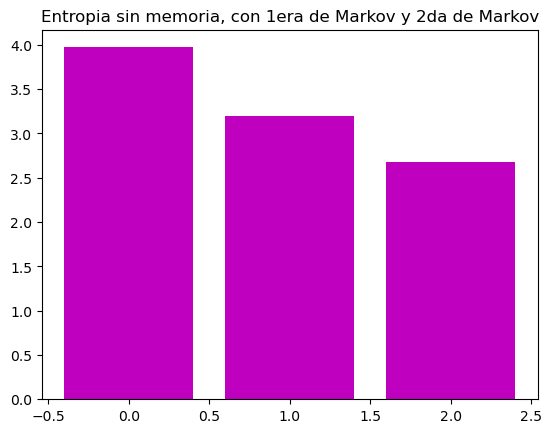

In [11]:
pc1 = np.zeros((len(ABC), len(ABC)))

for x in range(len(ABC)):
    for y in range(len(ABC)):
        if ABC0[y] == 0:
            pc1[x, y] = 0
        else:
            pc1[x, y] = cont2[x, y] / ABC0[y]

marcov1 = 0

for x in range(len(ABC)):
    for y in range(len(ABC)):
        if pc1[x, y] != 0:
            marcov1 += p1[y] * pc1[x, y] * np.log2(1 / pc1[x, y])

pc2 = np.zeros((len(ABC), len(ABC), len(ABC)))

for x in range(len(ABC)):
    for y in range(len(ABC)):
        for z in range(len(ABC)):
            if cont3[x, y, z] == 0:
                pc2[x, y, z] = 0
            else:
                pc2[x, y, z] = cont3[x, y, z] / cont2[y, z]

marcov2 = 0

for x in range(len(ABC)):
    for y in range(len(ABC)):
        for z in range(len(ABC)):
            if pc2[x, y, z] != 0:
                marcov2 += p1[z] * pc1[y, z] * pc2[x, y, z] * np.log2(1 / pc2[x, y, z])

print('\nPORTUGUES: ENTROPIA COMO FUENTE CON MEMORIA MARKOV 2°= %f  \n\n' % marcov2)

hs = [H, marcov1, marcov2]

plt.figure(1)
plt.title("Entropia sin memoria, con 1era de Markov y 2da de Markov")
plt.bar(np.arange(len(hs)), hs, color='m')
plt.show()

__Número total de caracteres analizados en el texto seleccionado.__

In [12]:
print(f"Número total de caracteres analizados en el texto seleccionado:", len(cadena))

Número total de caracteres analizados en el texto seleccionado: 101340


__Estadística comparativa sobre el número total de vocales vs. número total de consontantes__

In [13]:
# Contamos el numero de vocales y consonantes que hay en el texto depurado
nVocales = 0
nConsonantes = 0
for i in range(len(cadena)):
    if cadena[i] == 'a' or cadena[i] == 'e' or cadena[i] == 'i' or cadena[i] == 'o' or cadena[i] == 'u' :
        nVocales += 1
    elif cadena[i].isalpha():
    # elif cadena[i] != 'a' and cadena[i] != 'e' and cadena[i] != 'i' and cadena[i] != 'o' and cadena[i] != 'u' and cadena[i] != ' ': 
        nConsonantes +=1


print("Numero de vocales:", nVocales)
print("Numero de consonantes", nConsonantes)

Numero de vocales: 41441
Numero de consonantes 43039


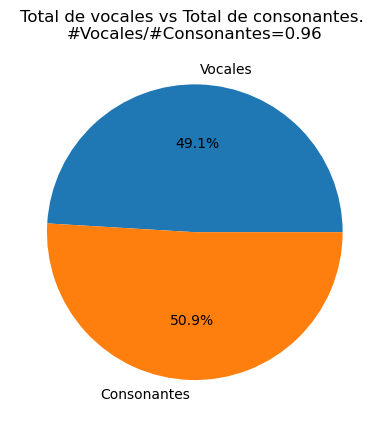

In [14]:
etiquetas = ['Vocales', 'Consonantes']
valores = [nVocales, nConsonantes]

relacion = nVocales / nConsonantes
titulo = 'Total de vocales vs Total de consonantes. \n#Vocales/#Consonantes={:.2f}'.format(relacion)


plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.title(titulo)
plt.show()

__Número total de palabras contenidas en dicho texto__

In [15]:
palabras = cadena.split("&")
with open("palabras_en_el_texto.txt", "w") as archivo:
    for palabra in palabras:
        archivo.write(palabra + "\n")
nPalabras = len(palabras)
print("El numero de palabras contenidas en el texto es de:", nPalabras)

El numero de palabras contenidas en el texto es de: 16861


__Promedio de caracteres por palabra__

In [16]:
# Promedio de caracteres por palabra
nCaracteres = 0
for i in range(len(cadena)):
    if cadena[i] != "&":
        nCaracteres += 1
print("Numero total de caracteres", nCaracteres)

# Promedio de caracteres por palabra
promedio = nCaracteres / nPalabras
print("promedio de caracteres por palabra:", promedio)

Numero total de caracteres 84480
promedio de caracteres por palabra: 5.0103789810806


__Gráfica de barras de todas las letras del Portugues y su frecuencia de aparición en dicho texto__

In [17]:
# Abrir archivo
with open('texto_depurado.txt', 'r',encoding="latin-1") as archivo:
    cadena = archivo.read() # guardar archivo en una cadena

In [18]:
# vector con 26 letras de 27 del español mas el espacio, total 27 simbolos
ABC = ['a', 'b', 'c', 'ç', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
    'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '&']

In [19]:
# conteo de repeticiones por cada caracter
ABC0 = np.zeros(len(ABC)) # vector para conteo de repeticiones de c/letra
cont = 0
for x in range(len(ABC)):
    rep = 0 # variable donde se guarda el # de repeticiones de 'x' caracter
    for y in range(len(cadena)):
        if cadena[y] == ABC[x]:
            rep += 1
    ABC0[cont] = rep # guardo el # de repeticiones en el vector de conteo
    cont += 1
    print('\n{} repeticiones: {}'.format(ABC[x], ABC0[x]))


a repeticiones: 11815.0

b repeticiones: 656.0

c repeticiones: 2999.0

ç repeticiones: 0.0

d repeticiones: 4022.0

e repeticiones: 10915.0

f repeticiones: 786.0

g repeticiones: 1053.0

h repeticiones: 1089.0

i repeticiones: 4951.0

j repeticiones: 223.0

k repeticiones: 0.0

l repeticiones: 2176.0

m repeticiones: 4152.0

n repeticiones: 4060.0

o repeticiones: 9582.0

p repeticiones: 2230.0

q repeticiones: 1163.0

r repeticiones: 5762.0

s repeticiones: 6675.0

t repeticiones: 3727.0

u repeticiones: 4178.0

v repeticiones: 1374.0

w repeticiones: 0.0

x repeticiones: 195.0

y repeticiones: 0.0

z repeticiones: 368.0

& repeticiones: 16860.0


Text(0.5, 1.0, 'p(x): Probabilidad de cada caracter')

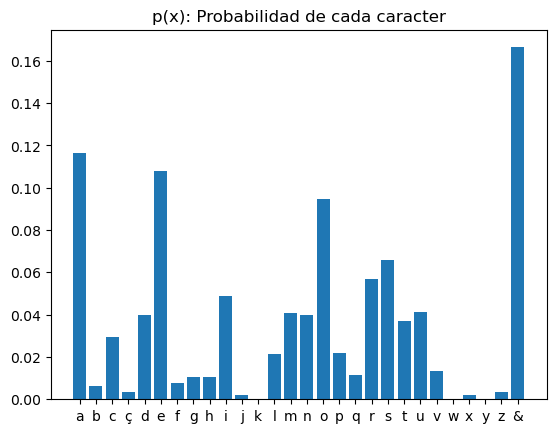

In [20]:
# Grafica que indica la probabilidad de cada letra
letras = ['a', 'b', 'c', 'ç', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
    'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '&']
fig, ax = plt.subplots()
ax.bar(letras, p1)
ax.set_title('p(x): Probabilidad de cada caracter')

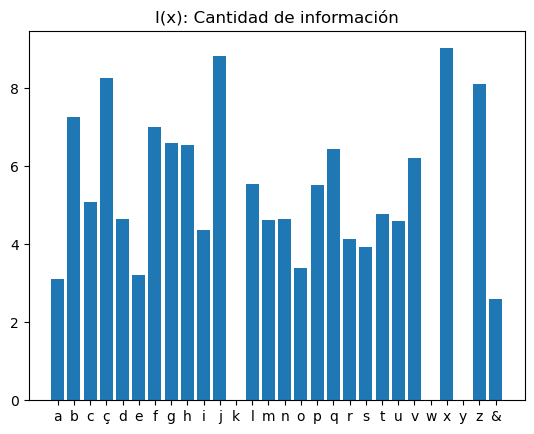

In [21]:
# Grafica de la cantidad de informacion
fig2, ax2 = plt.subplots()
ax2.bar(letras, I1)
ax2.set_title('I(x): Cantidad de información')

plt.show()

__Estadística de aparición de los símbolos en grupo de cuatro caracteres seguidos__

In [22]:
import numpy as np

with open("texto_depurado.txt", "r", encoding="utf-8") as f:
    cadena = f.read()

ABC = ['a', 'b', 'c', 'ç', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
    'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '&']
# Definir la matriz cont4 utilizando numpy
cont4 = np.zeros((len(ABC), len(ABC), len(ABC), len(ABC)))

# Iterar sobre las posiciones de la cadena utilizando una ventana deslizante
n = len(cadena) - 3
for i in range(n):
    window = cadena[i:i+4]
    x, y, z, q = [ABC.index(c) for c in window]
    cont4[x, y, z, q] += 1

# Iterar sobre los cuartetos no nulos
cuartetos = []
txt4 = ""
for x, y, z, q in np.ndindex(cont4.shape):
    if cont4[x, y, z, q] != 0:
        p = cont4[x, y, z, q] / n
        I = np.log2(1/p)
        if np.isinf(I):
            I = 0
        cuartetos.append((ABC[x], ABC[y], ABC[z], ABC[q], cont4[x, y, z, q], p, I))
        txt4 += f"{ABC[x]}{ABC[y]}{ABC[z]}{ABC[q]}   repeticiones: {int(cont4[x, y, z, q])}   P={p:.6f}   I={I:.6f}\n"


with open("estadisticas_por_cuartetas.txt", "w", encoding="utf-8") as f:
    f.write(txt4)


Las 10 cuartetas más frecuentes:
&que  Repeticiones: 738, P=0.007283, I=7.101324
que&  Repeticiones: 688, P=0.006789, I=7.202537
&de&  Repeticiones: 478, P=0.004717, I=7.727935
nao&  Repeticiones: 384, P=0.003789, I=8.043839
&nao  Repeticiones: 381, P=0.00376, I=8.055154
&com  Repeticiones: 354, P=0.003493, I=8.161196
&est  Repeticiones: 307, P=0.003029, I=8.366707
nte&  Repeticiones: 265, P=0.002615, I=8.578953
o&qu  Repeticiones: 263, P=0.002595, I=8.589883
ente  Repeticiones: 247, P=0.002437, I=8.680434


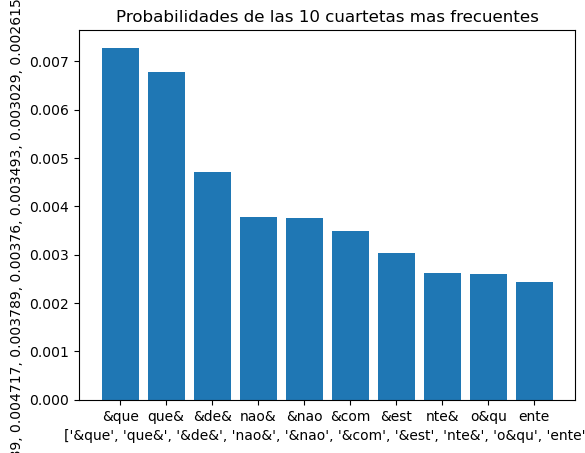

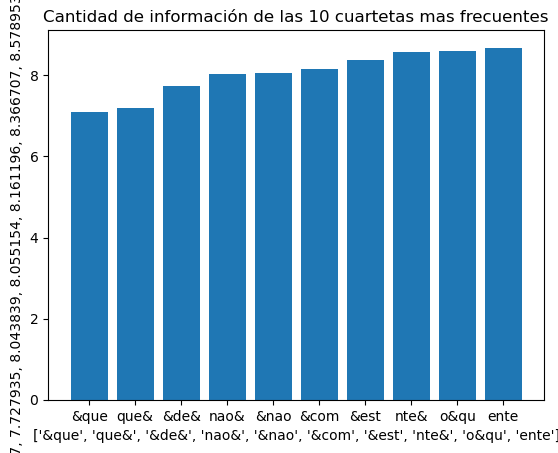

In [23]:
import re
from operator import itemgetter

# Lectura del archivo de texto
with open("estadisticas_por_cuartetas.txt") as f:
    txt = f.read()

# Expresión regular para encontrar líneas de interés
regex = r"([a-zç&]{4})\s+repeticiones:\s+(\d+)\s+P=([\d\.]+)\s+I=([\d\.]+)"

# Búsqueda de coincidencias
matches = re.findall(regex, txt4)

# Procesamiento de cada coincidencia para extraer valores requeridos
results = []
for match in matches:
    cuarteta = match[0]
    repetitions = int(match[1])
    probability = float(match[2])
    information = float(match[3])
    results.append((cuarteta, repetitions, probability, information))

# Ordenar por número de repeticiones y tomar las 10 primeras entradas
sorted_results = sorted(results, key=itemgetter(1), reverse=True)
top10 = sorted_results[:10]


cuartetas = []
probabilidades = []
informacion = []
# Imprimir información para las 10 cuartetas más comunes
print("Las 10 cuartetas más frecuentes:")
for i, (cuarteta, repetitions, probability, information) in enumerate(top10):
    cuartetas.append(cuarteta)
    probabilidades.append(probability)
    informacion.append(information)
    print(f"{cuarteta}  Repeticiones: {repetitions}, P={probability}, I={information}")

plt.bar(cuartetas, probabilidades)
plt.xlabel(cuartetas)
plt.ylabel(probabilidades)
plt.title("Probabilidades de las 10 cuartetas mas frecuentes")
plt.show()

plt.bar(cuartetas, informacion)
plt.xlabel(cuartetas)
plt.ylabel(informacion)
plt.title("Cantidad de información de las 10 cuartetas mas frecuentes")
plt.show()


__Estadística de aparición de los símbolos en cinco caracteres seguidos__

In [24]:
with open("texto_depurado.txt", "r", encoding="utf-8") as f:
    cadena = f.read()

ABC = ['a', 'b', 'c', 'ç', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
    'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '&']
# Definir la matriz cont5 utilizando numpy
cont5 = np.zeros((len(ABC), len(ABC), len(ABC), len(ABC), len(ABC)))

# Iterar sobre las posiciones de la cadena utilizando una ventana deslizante
n = len(cadena) - 4
for i in range(n):
    window = cadena[i:i+5]
    x, y, z, q, u = [ABC.index(c) for c in window]
    cont5[x, y, z, q, u] += 1

# Iterar sobre las quintetas no nulas
quintetos = []
txt5 = ""
for x, y, z, q, u in np.ndindex(cont5.shape):
    if cont5[x, y, z, q, u] != 0:
        p = cont5[x, y, z, q, u] / n
        I = np.log2(1/p)
        if np.isinf(I):
            I = 0
        quintetos.append((ABC[x], ABC[y], ABC[z], ABC[q], ABC[u], cont5[x, y, z, q, u], p, I))
        txt5 += f"{ABC[x]}{ABC[y]}{ABC[z]}{ABC[q]}{ABC[u]}   repeticiones: {int(cont5[x, y, z, q, u])}   P={p:.6f}   I={I:.6f}\n"
        


# Escribir el archivo de salida
with open("estadisticas_por_quintetas.txt", "w", encoding="utf-8") as f:
    f.write(txt5)


Las 10 quintetas mas frecuentes
&que& repeticiones: 608 P= 0.006 I= 7.38086 bits
&nao& repeticiones: 352 P= 0.003474 I= 8.169356 bits
o&que repeticiones: 225 P= 0.00222 I= 8.815006 bits
&esta repeticiones: 208 P= 0.002053 I= 8.928348 bits
ente& repeticiones: 198 P= 0.001954 I= 8.999431 bits
&para repeticiones: 178 P= 0.001757 I= 9.153054 bits
para& repeticiones: 162 P= 0.001599 I= 9.288937 bits
&como repeticiones: 141 P= 0.001391 I= 9.489236 bits
como& repeticiones: 138 P= 0.001362 I= 9.520263 bits
&uma& repeticiones: 138 P= 0.001362 I= 9.520263 bits


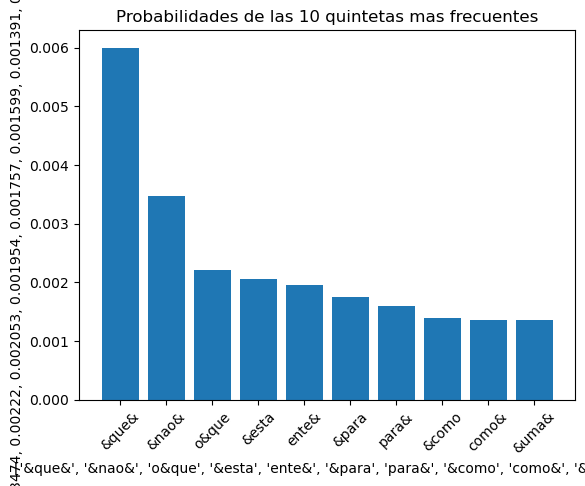

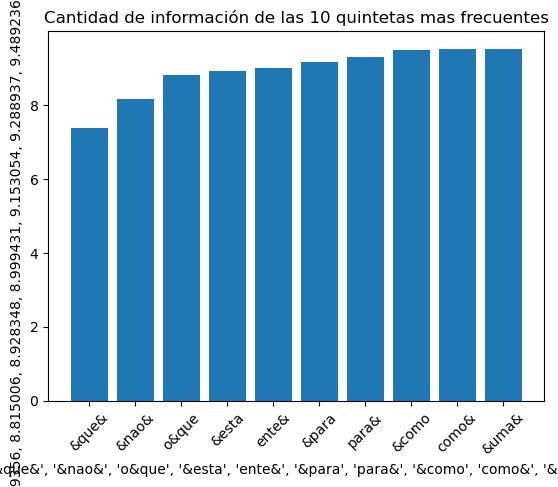

In [25]:
with open("estadisticas_por_quintetas.txt") as f:
    txt = f.read()

regex = r"([a-zç&]{5})\s+repeticiones:\s+(\d+)\s+P=([\d\.]+)\s+I=([\d\.]+)"
matches = re.findall(regex, txt)

results = []
for match in matches:
    quinteta = match[0]
    repetitions = int(match[1])
    probability = float(match[2])
    information = float(match[3])
    results.append((quinteta, repetitions, probability, information))

sorted_results = sorted(results, key=itemgetter(1), reverse=True)
top10 = sorted_results[:10]

quintetas = []
probabilidades = []
informacion = []
print("Las 10 quintetas mas frecuentes")
for i, (quinteta, repetitions, probability, information) in enumerate(top10):
    quintetas.append(quinteta)
    probabilidades.append(probability)
    informacion.append(information)
    print(f'{quinteta} repeticiones: {repetitions} P= {probability} I= {information} bits')

plt.bar(quintetas, probabilidades)
plt.xticks(rotation=45)
plt.xlabel(quintetas)
plt.ylabel(probabilidades)
plt.title("Probabilidades de las 10 quintetas mas frecuentes")
plt.show()

plt.bar(quintetas, informacion)
plt.xticks(rotation=45)
plt.xlabel(quintetas)
plt.ylabel(informacion)
plt.title("Cantidad de información de las 10 quintetas mas frecuentes")
plt.show()


__Cálculo de la entropía como fuente con memoria (Markov de 3er. Orden)__

In [26]:
ABC = np.array( ['a', 'b', 'c', 'ç', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
    'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '&'])

# conteo de repeticiones por cada caracter
ABC0 = np.zeros(len(ABC)) # vector para conteo de repeticiones de c/letra

pc3 = np.zeros((len(ABC), len(ABC), len(ABC), len(ABC)))

for x in range(len(ABC)):
    for y in range(len(ABC)):
        for z in range(len(ABC)):
            for q in range(len(ABC)):
                if cont4[x, y, z, q] == 0 or cont3[y, z, q] == 0:
                    pc3[x, y, z, q] = 0
                else:
                    pc3[x, y, z, q] = cont4[x, y, z, q] / cont3[y, z, q]

marcov3 = 0

for x in range(len(ABC)):
    for y in range(len(ABC)):
        for z in range(len(ABC)):
            for q in range(len(ABC)):
                if pc3[x, y, z, q] != 0:
                    marcov3 += p1[q] * pc1[z, q] * pc2[y, z, q] * pc3[x, y, z, q] * np.log2(1 / pc3[x, y, z, q])

print('\nPORTUGUES: ENTROPIA COMO FUENTE CON MEMORIA MARKOV 3°= %f  \n\n' % marcov3)




PORTUGUES: ENTROPIA COMO FUENTE CON MEMORIA MARKOV 3°= 2.119816  




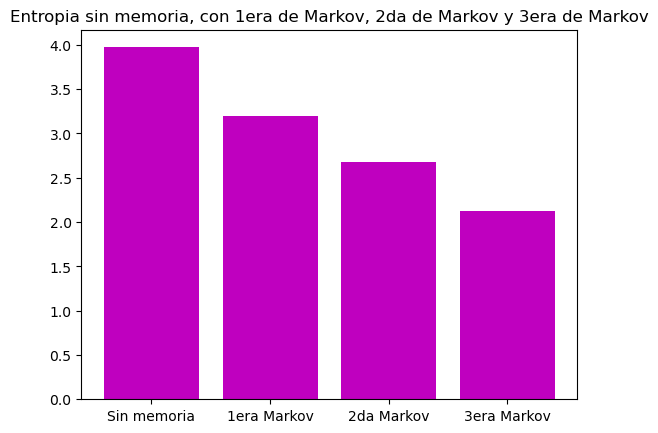

In [27]:
hs = [H, marcov1, marcov2, marcov3]
etiquetas = ["Sin memoria", "1era Markov", "2da Markov", "3era Markov"]

plt.figure(1)
plt.title("Entropia sin memoria, con 1era de Markov, 2da de Markov y 3era de Markov")
plt.bar(np.arange(len(hs)), hs, color='m')
plt.xticks(np.arange(len(hs)), etiquetas)
plt.show()

## Generación de palabras

In [28]:
import numpy as np

caracteres = np.array(['a', 'b', 'c', 'ç', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
                    'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '&'])

p1 = [0.11697325, 0.00649466, 0.02969131, 0. ,0.03981942 ,0.10806289,
 0.00778172, 0.01042512, 0.01078154, 0.04901689, 0.00220779, 0.,
 0.02154327, 0.04110647, 0.04019563, 0.09486565, 0.0220779,  0.01151417,
 0.05704612, 0.06608518, 0.0368988,  0.04136388, 0.01360315, 0.,
 0.00193058, 0.,         0.00364335, 0.16687127]
probabilidades_caracteres = np.array(p1)

# Calcular los límites de los rangos
rangos = np.cumsum(probabilidades_caracteres)
rangos = np.insert(rangos, 0, 0.0)  # Añadir límite inferior para el primer rango

print(f"ranges:{rangos} \n\n")
# print(len(rangos))

# Distribuir las probabilidades en el rango de 0.0 a 1.0
probabilidades_distribuidas_caracteres = np.zeros_like(probabilidades_caracteres)
for i in range(len(caracteres)):
    ancho_rango = probabilidades_caracteres[i]
    limite_inferior = rangos[i]
    limite_superior = rangos[i+1]
    probabilidades_distribuidas_caracteres[i] = (limite_inferior + ancho_rango/2) + \
                                                np.random.uniform(-ancho_rango/2, ancho_rango/2)


ranges:[0.         0.11697325 0.12346791 0.15315922 0.15315922 0.19297864
 0.30104153 0.30882325 0.31924837 0.33002991 0.3790468  0.38125459
 0.38125459 0.40279786 0.44390433 0.48409996 0.57896561 0.60104351
 0.61255768 0.6696038  0.73568898 0.77258778 0.81395166 0.82755481
 0.82755481 0.82948539 0.82948539 0.83312874 1.00000001] 




In [29]:
import random

rangos_caracteres = [(0.0, 0.11697325), (0.11697325, 0.12346791), (0.12346791, 0.15315922), (0.15315922, 0.15315922), (0.15315922, 0.19297863), (0.19297863, 0.30104152), (0.30104152, 0.30882324), (0.30882324, 0.31924836), (0.31924836, 0.3300299), (0.3300299, 0.37904679), (0.37904679, 0.38125458), (0.38125458, 0.38125458), (0.38125458, 0.40279785), (0.40279785, 0.44390432), (0.44390432, 0.48409995), (0.48409995, 0.57896561), (0.57896561, 0.6010435), (0.6010435, 0.61255767), (0.61255767, 0.66960379), (0.66960379, 0.73568897), (0.73568897, 0.77258777), (0.77258777, 0.81395165), (0.81395165, 0.8275548), (0.8275548, 0.8275548), (0.8275548, 0.82948538), (0.82948538, 0.82948538), (0.82948538, 0.83312873), (0.83312873, 1.0)]

def generar_caracter(rangos, caracteres):
    num_aleatorio = random.random()
    for rango, caracter in zip(rangos, caracteres):
        if num_aleatorio >= rango[0] and num_aleatorio < rango[1]:
            return caracter

caracter_generado = generar_caracter(rangos_caracteres, caracteres)
print(caracter_generado)

t


In [30]:
probabilidades_parejas = np.array(p2)

In [31]:
import re
from operator import itemgetter
import matplotlib.pyplot as plt

pattern = r"\n([\w&]{2}):\s*repeticiones\s*(\d+)\s*P=\s*(\d*\.\d+|\d+\.\d*|\d+)\s*I=\s*(\d*\.\d+|\d+\.\d*)\s*bits"


matches = re.findall(pattern, txt2)

results = []
parejas = []
p2 = []
for match in matches:
    pair = match[0]
    parejas.append(pair)
    repetitions = int(match[1])
    probability = float(match[2])
    p2.append(probability)
    information = float(match[3])
    results.append((pair, repetitions, probability, information))

probabilidades_parejas = [prob for prob in p2 if prob != 0]

# Calcular los límites de los rangos
rangos_parejas = np.cumsum(probabilidades_parejas)
rangos_parejas = np.insert(rangos_parejas, 0, 0.0)  # Añadir límite inferior para el primer rango


# Distribuir las probabilidades en el rango de 0.0 a 1.0
probabilidades_distribuidas_parejas = np.zeros_like(probabilidades_parejas)
for i in range(len(parejas)):
    ancho_rango = probabilidades_parejas[i]
    limite_inferior = rangos_parejas[i]
    limite_superior = rangos_parejas[i+1]
    probabilidades_distribuidas_parejas[i] = (limite_inferior + ancho_rango/2) + \
                                                np.random.uniform(-ancho_rango/2, ancho_rango/2)


In [32]:
# Generar los rangos como tuplas
rangos_parejas = []
inicio = 0
for i, prob in enumerate(probabilidades_parejas):
    fin = inicio + prob
    rango = (inicio, fin)
    rangos_parejas.append(rango)
    inicio = fin

# Función para seleccionar una pareja de caracteres aleatoria
def generar_pareja_aleatoria(caracter_anterior):
    # aleatorio = random.random()
    parejas_que_inician_con_caracter = []
    rangos_parejas_que_inician = []
    for pareja, rango in zip(parejas, rangos_parejas):
        if pareja[0] == caracter_anterior[0]:
            parejas_que_inician_con_caracter.append(pareja)
            rangos_parejas_que_inician.append(rango)

    # Extraer los límites inferiores y superiores de cada rango
    limites_inferiores = [rango[0] for rango in rangos_parejas_que_inician]
    limites_superiores = [rango[1] for rango in rangos_parejas_que_inician]

    # Generar un número aleatorio dentro del rango de probabilidades
    while True:
        # Generar un número aleatorio dentro del rango de probabilidades
        aleatorio = random.uniform(min(rangos_parejas_que_inician)[0], max(rangos_parejas_que_inician)[1])
        for pareja, rango in zip(parejas_que_inician_con_caracter, rangos_parejas_que_inician):
            if aleatorio >= rango[0] and aleatorio < rango[1]:
                return pareja
    
caracter_generado = generar_caracter(rangos_caracteres, caracteres)
print(generar_pareja_aleatoria(caracter_generado))

er


In [33]:
import re
from operator import itemgetter
import matplotlib.pyplot as plt

pattern = r"\n([\w&]{3}):\s*repeticiones\s*(\d+)\s*P=\s*(\d*\.\d+|\d+\.\d*|\d+)\s*I=\s*(\d*\.\d+|\d+\.\d*)\s*bits"
pattern = r"\n([\w&]{3}):\s*repeticiones\s*(\d+)\s*P=\s*(\d*\.\d+|\d+\.\d*|\d+)\s*I=\s*(\d*\.\d+|\d+\.\d*)\s*bits"

matches = re.findall(pattern, txt3)

results = []
tercias = []
p3 = []
for match in matches:
    tercia = match[0]
    tercias.append(tercia)
    repetitions = int(match[1])
    probability = float(match[2])
    p3.append(probability)
    information = float(match[3])
    results.append((tercia, repetitions, probability, information))

probabilidades_tercias = [prob for prob in p3 if prob != 0]

# Calcular los límites de los rangos
rangos_tercias = np.cumsum(probabilidades_tercias)
rangos_tercias = np.insert(rangos_tercias, 0, 0.0)  # Añadir límite inferior para el primer rango


# Distribuir las probabilidades en el rango de 0.0 a 1.0
probabilidades_distribuidas_tercias = np.zeros_like(probabilidades_tercias)
for i in range(len(tercias)):
    ancho_rango = probabilidades_tercias[i]
    limite_inferior = rangos_tercias[i]
    limite_superior = rangos_tercias[i+1]
    probabilidades_distribuidas_tercias[i] = (limite_inferior + ancho_rango/2) + \
                                                np.random.uniform(-ancho_rango/2, ancho_rango/2)

In [34]:
print(tercias)
print(rangos_tercias)
print(len(probabilidades_distribuidas_tercias))

['aba', 'abe', 'abi', 'abo', 'abr', 'aca', 'ace', 'ach', 'aci', 'aco', 'acr', 'act', 'acu', 'aça', 'aço', 'ada', 'ade', 'adi', 'ado', 'adr', 'ae&', 'afa', 'afi', 'aga', 'age', 'agi', 'ago', 'agr', 'agu', 'ain', 'air', 'ais', 'aiu', 'aix', 'ai&', 'aju', 'ala', 'alç', 'ale', 'alg', 'alh', 'ali', 'alm', 'alo', 'alp', 'alq', 'alt', 'alv', 'al&', 'ama', 'amb', 'ame', 'ami', 'amo', 'ams', 'amu', 'am&', 'ana', 'anc', 'anç', 'and', 'ane', 'ang', 'anh', 'ani', 'ano', 'ans', 'ant', 'aos', 'ao&', 'apa', 'ape', 'api', 'apo', 'apr', 'aqu', 'ara', 'arc', 'ard', 'are', 'ari', 'arm', 'aro', 'arr', 'ars', 'art', 'ar&', 'asa', 'asc', 'ase', 'aso', 'asp', 'ass', 'ast', 'as&', 'ata', 'ate', 'ati', 'ato', 'atr', 'atu', 'aus', 'aut', 'ava', 'ave', 'avi', 'avo', 'avr', 'aze', 'azi', 'az&', 'a&a', 'a&b', 'a&c', 'a&d', 'a&e', 'a&f', 'a&g', 'a&h', 'a&i', 'a&j', 'a&l', 'a&m', 'a&n', 'a&o', 'a&p', 'a&q', 'a&r', 'a&s', 'a&t', 'a&u', 'a&v', 'bai', 'ban', 'bar', 'bas', 'beç', 'bei', 'bem', 'ber', 'bia', 'bic', 'bil'

In [35]:

# Generar los rangos como tuplas
rangos_tercias = []
inicio = 0
for i, prob in enumerate(probabilidades_tercias):
    fin = inicio + prob
    rango = (inicio, fin)
    rangos_tercias.append(rango)
    inicio = fin

def generar_tercia_aleatoria(pareja_anterior):
    # aleatorio = random.random()
    tercias_que_inician_con_pareja = []
    rangos_tercias_que_inician = []
    for tercia, rango in zip(tercias, rangos_tercias):
        if tercia[0:2] == pareja_anterior:
            tercias_que_inician_con_pareja.append(tercia)
            rangos_tercias_que_inician.append(rango)
    # Extraer los límites inferiores y superiores de cada rango
    limites_inferiores = [rango[0] for rango in rangos_tercias_que_inician]
    limites_superiores = [rango[1] for rango in rangos_tercias_que_inician]

    # Generar un número aleatorio dentro del rango de probabilidades
    while True:
        # Generar un número aleatorio dentro del rango de probabilidades
        aleatorio = random.uniform(min(rangos_tercias_que_inician)[0], max(rangos_tercias_que_inician)[1])
        for tercia, rango in zip(tercias_que_inician_con_pareja, rangos_tercias_que_inician):
            if aleatorio >= rango[0] and aleatorio < rango[1]:
                return tercia


caracter_generado = generar_caracter(rangos_caracteres, caracteres)
pareja_generada = generar_pareja_aleatoria(caracter_generado)
print(generar_tercia_aleatoria(pareja_generada))

&ta


Cuartetas

In [36]:
pattern = r"([a-zç&]{4})\s+repeticiones:\s+(\d+)\s+P=([\d\.]+)\s+I=([\d\.]+)"

matches = re.findall(pattern, txt4)

results = []
cuartetas = []
p4 = []
for match in matches:
    cuarteta = match[0]
    cuartetas.append(cuarteta)
    repetitions = int(match[1])
    probability = float(match[2])
    p4.append(probability)
    information = float(match[3])
    results.append((cuarteta, repetitions, probability, information))

probabilidades_cuartetas = [prob for prob in p4 if prob != 0]

# Calcular los límites de los rangos
rangos_cuartetas = np.cumsum(probabilidades_cuartetas)
rangos_cuartetas = np.insert(rangos_cuartetas, 0, 0.0)  # Añadir límite inferior para el primer rango


# Distribuir las probabilidades en el rango de 0.0 a 1.0
probabilidades_distribuidas_cuartetas = np.zeros_like(probabilidades_cuartetas)
for i in range(len(cuartetas)):
    ancho_rango = probabilidades_cuartetas[i]
    limite_inferior = rangos_cuartetas[i]
    limite_superior = rangos_cuartetas[i+1]
    probabilidades_distribuidas_cuartetas[i] = (limite_inferior + ancho_rango/2) + \
                                                np.random.uniform(-ancho_rango/2, ancho_rango/2)

In [37]:
print(cuartetas)

['aace', 'aafa', 'aafl', 'aagn', 'aagu', 'aah&', 'aaju', 'aalc', 'aalg', 'aama', 'aamb', 'aang', 'aans', 'aant', 'aaos', 'aao&', 'aapa', 'aapo', 'aaqu', 'aarr', 'aass', 'aast', 'aata', 'aatm', 'aaut', 'aa&b', 'aa&c', 'aa&e', 'aa&m', 'aa&p', 'abad', 'abaf', 'abag', 'abai', 'abal', 'abam', 'aban', 'abar', 'abas', 'abav', 'aba&', 'abec', 'abeç', 'abei', 'abel', 'abem', 'aben', 'aber', 'abet', 'abe&', 'abia', 'abic', 'abil', 'abin', 'abio', 'abis', 'abit', 'abne', 'aboa', 'aboc', 'abod', 'abor', 'abos', 'abou', 'abo&', 'abra', 'abri', 'abro', 'abso', 'absu', 'abun', 'acab', 'acal', 'acam', 'acao', 'acar', 'acas', 'acat', 'acau', 'acça', 'aceg', 'acei', 'acej', 'acel', 'acem', 'acen', 'acer', 'aces', 'ace&', 'acha', 'ache', 'achi', 'acho', 'acia', 'acid', 'acie', 'acil', 'acim', 'acin', 'acio', 'acir', 'acla', 'acob', 'acoi', 'acol', 'acom', 'acon', 'acor', 'acou', 'aco&', 'acra', 'acre', 'acri', 'acta', 'acte', 'acti', 'acto', 'acud', 'acui', 'acul', 'acur', 'acus', 'açad', 'açae', 'açam',

In [38]:
# Generar los rangos como tuplas
rangos_cuartetas = []
inicio = 0
for i, prob in enumerate(probabilidades_cuartetas):
    fin = inicio + prob
    rango = (inicio, fin)
    rangos_cuartetas.append(rango)
    inicio = fin

def generar_cuarteta_aleatoria(tercia_anterior):
    cuartetas_que_inician_con_tercia = []
    rangos_cuartetas_que_inician = []
    for cuarteta ,rango in zip(cuartetas, rangos_cuartetas):
        if cuarteta[0:3] == tercia_anterior:
            cuartetas_que_inician_con_tercia.append(cuarteta)
            rangos_cuartetas_que_inician.append(rango)
    # Sumar/restar una pequeña cantidad a los límites inferiores/superiores
    limites_inferiores = [rango[0] for rango in rangos_cuartetas_que_inician]
    limites_superiores = [rango[1] for rango in rangos_cuartetas_que_inician]

    while True:
        # Generar un número aleatorio dentro del rango de probabilidades
        aleatorio = random.uniform(min(rangos_cuartetas_que_inician)[0], max(rangos_cuartetas_que_inician)[1])
        for cuarteta, rango in zip(cuartetas_que_inician_con_tercia, rangos_cuartetas_que_inician):
            if aleatorio >= rango[0] and aleatorio < rango[1]:
                return cuarteta

caracter_generado = generar_caracter(rangos_caracteres, caracteres)
pareja_generada = generar_pareja_aleatoria(caracter_generado)
tercia_generada = generar_tercia_aleatoria(pareja_generada)
# print(tercia_generada)
print(generar_cuarteta_aleatoria(tercia_generada))

o&fa


In [39]:
quintetas

['&que&',
 '&nao&',
 'o&que',
 '&esta',
 'ente&',
 '&para',
 'para&',
 '&como',
 'como&',
 '&uma&']

In [40]:
pattern = r"([a-zç&]{5})\s+repeticiones:\s+(\d+)\s+P=([\d\.]+)\s+I=([\d\.]+)"

matches = re.findall(pattern, txt5)

results = []
quintetas = []
p5 = []
for match in matches:
    quinteta = match[0]
    quintetas.append(quinteta)
    repetitions = int(match[1])
    probability = float(match[2])
    p5.append(probability)
    information = float(match[3])
    results.append((quinteta, repetitions, probability, information))

probabilidades_quintetas = [prob for prob in p5 if prob != 0]

# Calcular los límites de los rangos
rangos_quintetas = np.cumsum(probabilidades_quintetas)
rangos_quintetas = np.insert(rangos_quintetas, 0, 0.0)  # Añadir límite inferior para el primer rango


# Distribuir las probabilidades en el rango de 0.0 a 1.0
probabilidades_distribuidas_quintetas = np.zeros_like(probabilidades_quintetas)
for i in range(len(quintetas)):
    ancho_rango = probabilidades_quintetas[i]
    limite_inferior = rangos_quintetas[i]
    limite_superior = rangos_quintetas[i+1]
    probabilidades_distribuidas_quintetas[i] = (limite_inferior + ancho_rango/2) + \
                                                np.random.uniform(-ancho_rango/2, ancho_rango/2)

In [41]:
# Generar los rangos como tuplas
rangos_quintetas = []
inicio = 0
for i, prob in enumerate(probabilidades_quintetas):
    fin = inicio + prob
    rango = (inicio, fin)
    rangos_quintetas.append(rango)
    inicio = fin

def generar_quinteta_aleatoria(cuarteta_anterior):
    # aleatorio = random.random()
    quintetas_que_inician_con_cuarteta = []
    rangos_quintetas_que_inician = []
    for quinteta, rango in zip(quintetas, rangos_quintetas):
        if quinteta[0:4] == cuarteta_anterior:
            quintetas_que_inician_con_cuarteta.append(quinteta)
            rangos_quintetas_que_inician.append(rango)

        # Sumar/restar una pequeña cantidad a los límites inferiores/superiores
    limites_inferiores = [rango[0] + 0.0001 for rango in rangos_quintetas_que_inician]
    limites_superiores = [rango[1] - 0.0001 for rango in rangos_quintetas_que_inician]

    while True:
        # Generar un número aleatorio dentro del rango de probabilidades
        aleatorio = random.uniform(min(rangos_quintetas_que_inician)[0], max(rangos_quintetas_que_inician)[1])
        for quinteta, rango in zip(quintetas_que_inician_con_cuarteta, rangos_quintetas_que_inician):
            if aleatorio >= rango[0] and aleatorio < rango[1]:
                return quinteta

caracter_generado = generar_caracter(rangos_caracteres, caracteres)
pareja_generada = generar_pareja_aleatoria(caracter_generado)
tercia_generada = generar_tercia_aleatoria(pareja_generada)
cuarteta_generada = generar_cuarteta_aleatoria(tercia_generada)
print(generar_quinteta_aleatoria(cuarteta_generada))

e&tra


In [78]:
texto = ""
z = 1
while len(texto) != 800:
    if z != 0:
        caracter = generar_caracter(rangos_caracteres, caracteres)
        pareja = generar_pareja_aleatoria(caracter)
        tercia = generar_tercia_aleatoria(pareja)
        cuarteta = generar_cuarteta_aleatoria(tercia)
        texto += generar_quinteta_aleatoria(cuarteta)
        z = 0
    ventana = random.randint(1, 4)
    # Obtener los últimos caracteres de la cadena
    ultimos_caracteres = texto[-ventana:]
    if len(ultimos_caracteres) == 1:
        pareja = generar_pareja_aleatoria(ultimos_caracteres)
        tercia = generar_tercia_aleatoria(pareja)
        cuarteta = generar_cuarteta_aleatoria(tercia)
        texto += generar_quinteta_aleatoria(cuarteta)
    if len(ultimos_caracteres) == 2:
        tercia = generar_tercia_aleatoria(ultimos_caracteres)
        cuarteta = generar_cuarteta_aleatoria(tercia)
        texto += generar_quinteta_aleatoria(cuarteta)
    if len(ultimos_caracteres) == 3:
        cuarteta = generar_cuarteta_aleatoria(ultimos_caracteres)
        texto += generar_quinteta_aleatoria(cuarteta)
    if len(ultimos_caracteres) == 4:
        texto += generar_quinteta_aleatoria(ultimos_caracteres)

texto = texto.replace("&", " ")


palabras = texto.split()  # Dividir el texto en una lista de palabras
nueva_cadena = ""  # Cadena vacía para almacenar el texto con saltos de línea

for i, palabra in enumerate(palabras):
    if i % 10 == 0 and i != 0:  # Agregar un salto de línea después de cada 10 palabras
        nueva_cadena += "\n"
    nueva_cadena += palabra + " "

print(nueva_cadena)


s foifoi ddarserse d dos mulhlha dderrarradorado do innfectfectuctuaddisseisse e 
naoos e e ar araprapazzer ur usousou do m mediimentmentoto 
nana caa cabcabeçça fa façaaçao emquemqueque a as uum cum 
cummurmuutrosros es e jja naao se se ae arrarrououbararaquraqueero f 
feriico sco seo semem vo voltltipltipliido q que e unss 
mananeirneirairadodos ddo meo meddo o o me mediirigiginararse rse ese 
em em p paraaratatardaardalaloususestsesteentrontrouou papara a duvduvididadeade ude um uma 
ma frfragaagar r do que que sue seeiro ro cecegosgos 
oos os oscacasiasia eia esessoaamaraalornnciarciar r o ccorpoorpo po fiidentnte 
oe o po parruas as mamaomaada d do mo maiio 
exo exa examm delele nle nae naoao lh lhe lhe 
phe poonememem ddadososse e esq esquesquiqui ei est estaestassa fi 
finaa a aa ama aman 
